In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df_arroz = pd.read_csv("../data/raw/arroz/INDICADOR DO ARROZ EM CASCA CEPEA-IRGA-RS.csv")

In [4]:
df_arroz.head()

,Data,À vista R$,À vista US$
0,30/06/2005,"20,41","8,71"
1,01/07/2005,"20,41","8,71"
2,03/07/2005,"21,18","9,04"
3,04/07/2005,"22,18","9,47"
4,05/07/2005,"20,41","8,71"


In [5]:
df_arroz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         4948 non-null   object
 1   À vista R$   4948 non-null   object
 2   À vista US$  4948 non-null   object
dtypes: object(3)
memory usage: 116.1+ KB


In [6]:
df_arroz_brl = extract_currency_series(df_arroz)
df_arroz_brl.head()

,Data,À vista R$
0,30/06/2005,"20,41"
1,01/07/2005,"20,41"
2,03/07/2005,"21,18"
3,04/07/2005,"22,18"
4,05/07/2005,"20,41"


In [7]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_arroz_brl = rename_columns_and_set_id(df_arroz_brl, cols_dict_brl, "ARROZ")
df_arroz_brl = convert_column_to_datetime(df_arroz_brl, "ds")
df_arroz_brl = convert_column_to_float(df_arroz_brl, "y")

df_arroz_brl.head()

,ds,y,unique_id
0,2005-06-30,20.41,ARROZ
1,2005-07-01,20.41,ARROZ
2,2005-07-03,21.18,ARROZ
3,2005-07-04,22.18,ARROZ
4,2005-07-05,20.41,ARROZ


In [8]:
df_arroz_brl.tail()

,ds,y,unique_id
4943,2025-04-30,75.92,ARROZ
4944,2025-05-02,75.75,ARROZ
4945,2025-05-05,75.33,ARROZ
4946,2025-05-06,75.37,ARROZ
4947,2025-05-07,75.10,ARROZ


In [9]:
df_arroz_brl = drop_over_limit_date(df_arroz_brl, '01/05/2025', "ds")
df_arroz_brl.tail()

,ds,y,unique_id
4939,2025-04-24,76.03,ARROZ
4940,2025-04-25,76.06,ARROZ
4941,2025-04-28,76.04,ARROZ
4942,2025-04-29,76.09,ARROZ
4943,2025-04-30,75.92,ARROZ


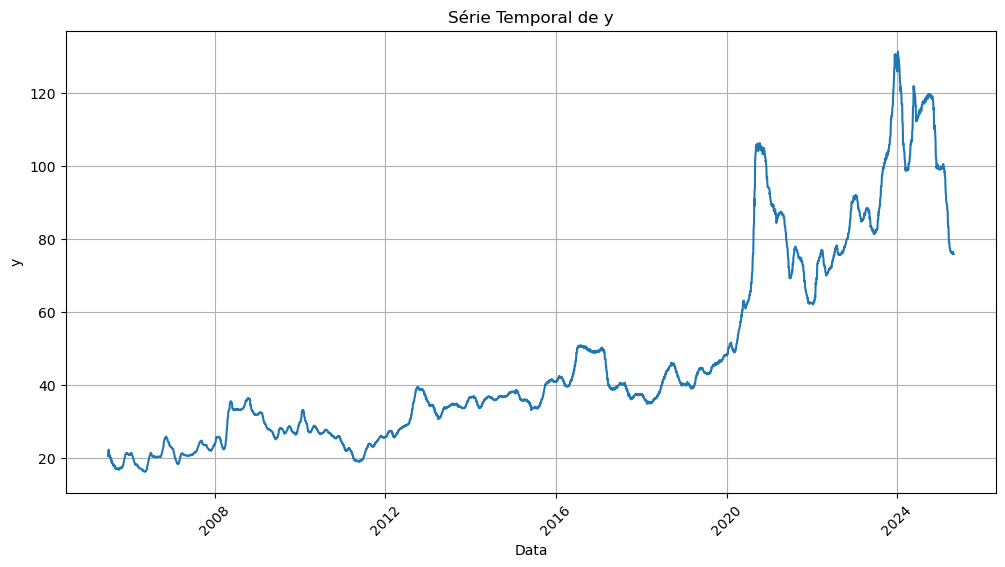

In [10]:
plot_raw_series(df_arroz_brl, "y")

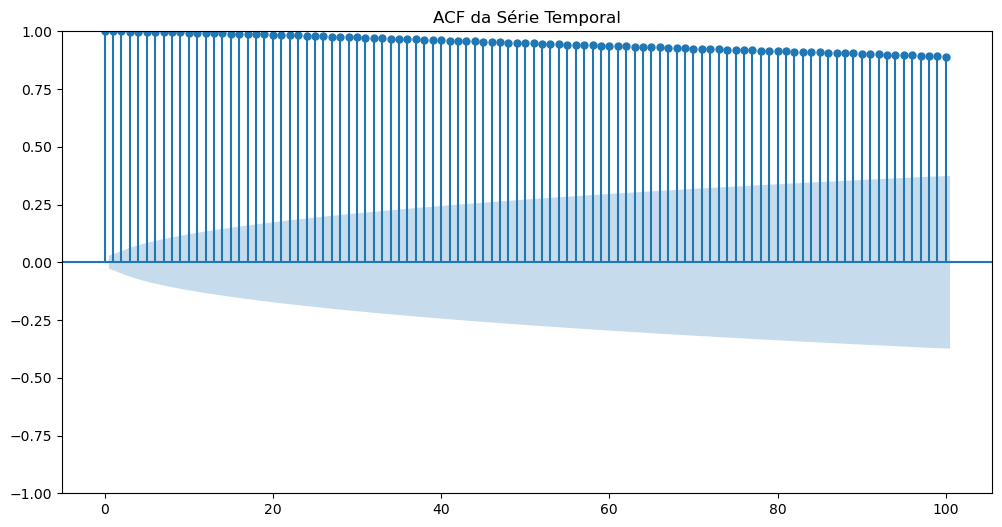

In [11]:
plot_series_acf(df_arroz_brl['y'])

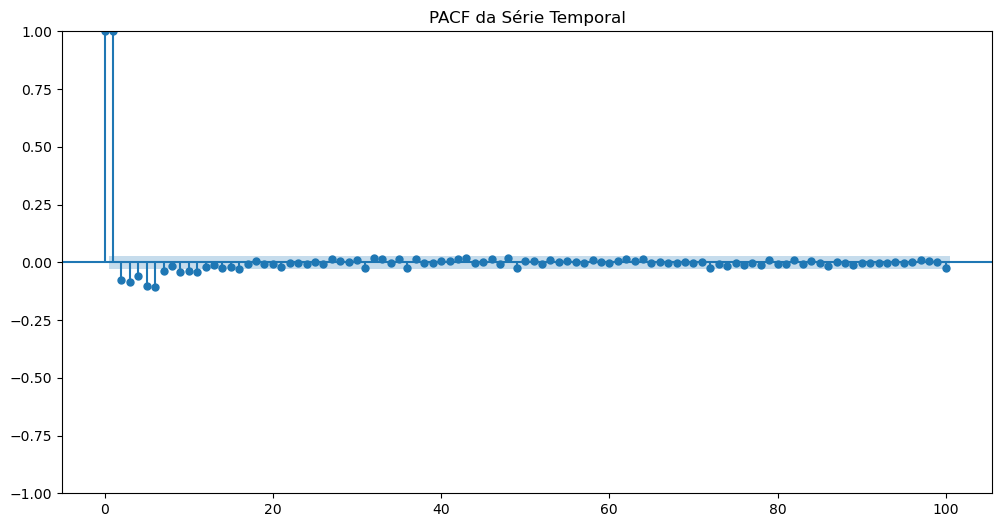

In [12]:
plot_series_pacf(df_arroz_brl['y'])

In [13]:
checks_stationarity(df_arroz_brl['y'])

ADF Statistic: -1.4326989870214886
p-value: 0.5665033472132364
Críticos: {'1%': np.float64(-3.431681173661765), '5%': np.float64(-2.8621282325741677), '10%': np.float64(-2.567083117297206)}
❌ Série não é estacionária.


In [14]:
export_to_parquet(df_arroz_brl, "../data/arroz/arroz_brl.parquet")

Arquivo salvo em: ../data/arroz/arroz_brl.parquet
